In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Gangseo_Gu_Only.csv")

In [3]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [6]:
df

,kaptCode,bjdCode,Household_Num,Begin_Date,Heating_Method,House_Type,Elec_Con,Elev_Num,Park_Above,Park_Below
0,A15786116,1150010100,290,19990402.0,개별난방,아파트,단일계약,8.0,40.0,238.0
1,A15704015,1150010100,284,20050328.0,개별난방,아파트,종합계약,12.0,0.0,450.0
2,A15786118,1150010100,330,19950708.0,개별난방,아파트,단일계약,9.0,204.0,117.0
3,A15786426,1150010100,498,19940421.0,개별난방,아파트,단일계약,21.0,215.0,181.0
4,A15704025,1150010100,455,20050923.0,개별난방,아파트,단일계약,13.0,145.0,385.0
...,...,...,...,...,...,...,...,...,...,...
170,A15722008,1150010900,65,NaN,NaN,아파트,NaN,NaN,NaN,NaN
171,A15722306,1150010900,284,19980821.0,개별난방,아파트,단일계약,9.0,64.0,222.0
172,A10023292,1150010900,90,20171123.0,개별난방,아파트,단일계약,4.0,78.0,4.0
173,A15722001,1150010900,170,19980109.0,개별난방,아파트,단일계약,7.0,55.0,165.0


In [7]:
df.isnull().sum()

kaptCode          0
bjdCode           0
Household_Num     0
Begin_Date        1
Heating_Method    1
House_Type        0
Elec_Con          6
Elev_Num          4
Park_Above        4
Park_Below        4
dtype: int64

<AxesSubplot: >

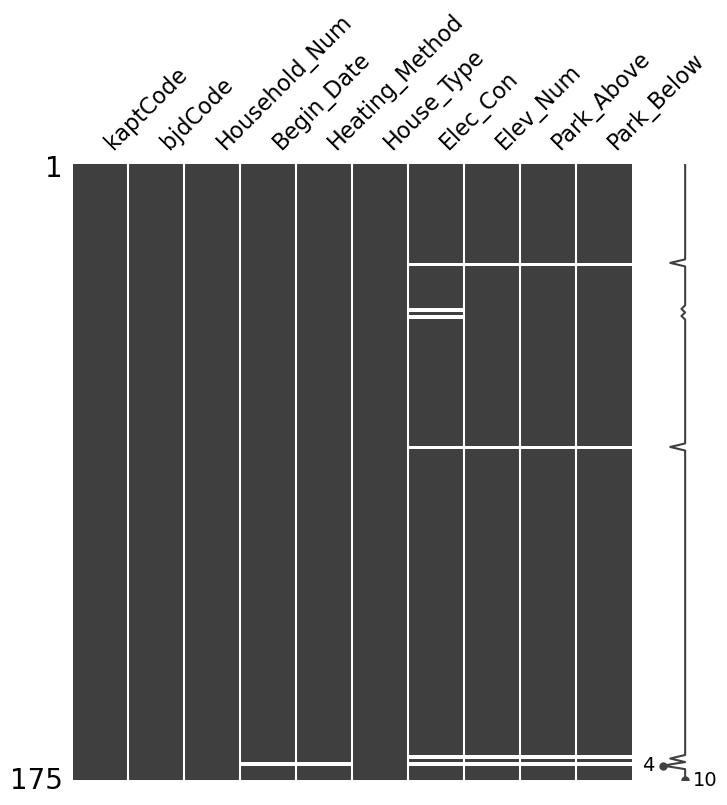

In [8]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [9]:
#null values
Begin_Date = df['Begin_Date']
print(f"There are {Begin_Date.isnull().sum()} null values, and they are located at \n{np.where(Begin_Date.isnull())[0]}")

There are 1 null values, and they are located at 
[170]


In [10]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0     1999-04-02
1     2005-03-28
2     1995-07-08
3     1994-04-21
4     2005-09-23
         ...    
169   1998-02-20
171   1998-08-21
172   2017-11-23
173   1998-01-09
174   2020-11-26
Name: Begin_Date, Length: 174, dtype: datetime64[ns]


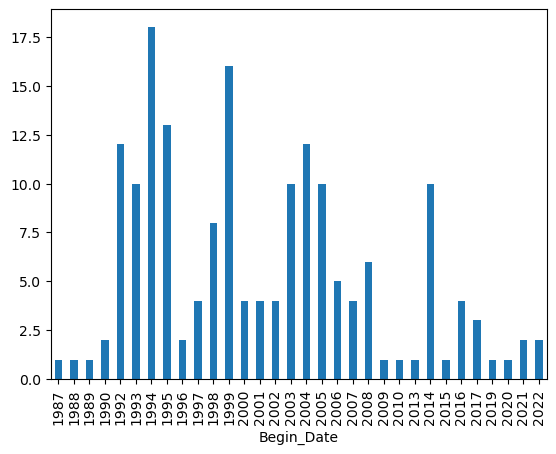

In [11]:
# distribution of years in Begin_Date
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

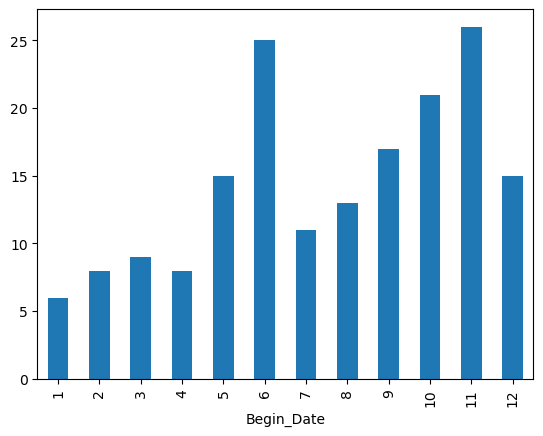

In [12]:
#Distribtion of months in Begin_Date(just for fun)
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [4]:
#1 null value
Household_Num = df['Household_Num']
print(f"There are {Household_Num.isnull().sum()} null values, and they are located at \n{np.where(Household_Num.isnull())[0]}")
display(Household_Num)

There are 0 null values, and they are located at 
[]


0      290
1      284
2      330
3      498
4      455
      ... 
170     65
171    284
172     90
173    170
174    298
Name: Household_Num, Length: 175, dtype: int64

In [5]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

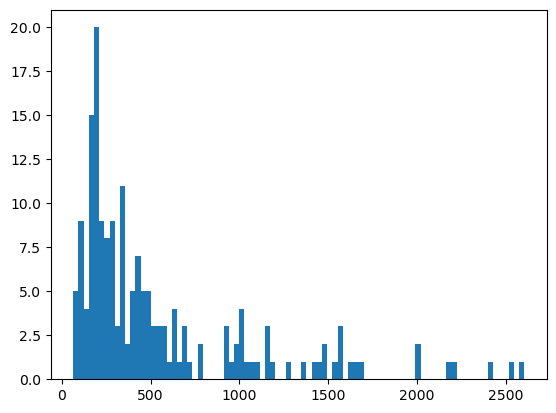

In [6]:
fig, ax = plt.subplots()
b = int(len(Household_Num)/2)
ax.hist(Household_Num, bins = b)
plt.show()

In [16]:
Household_Num.describe()

count     175.000000
mean      550.617143
std       531.162082
min        65.000000
25%       202.000000
50%       347.000000
75%       651.500000
max      2603.000000
Name: Household_Num, dtype: float64

In [17]:
def printApt (Column, df, dfInfo, maxmin = "max", ind= 0):
    if(maxmin == "max"):
        find = Column[Column == Column.max()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])
    elif(maxmin == "min"):
        find = Column[Column == Column.min()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])

In [18]:
printApt(Household_Num, df, dfInfo)

kaptCode           A15701007
bjdCode           1150010300
Household_Num           2603
Begin_Date        20150819.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num                77.0
Park_Above               5.0
Park_Below            4413.0
Name: 78, dtype: object
     kaptCode Complex_Name
85  A15701007   강서힐스테이트아파트


## Heating_Method

In [19]:
# null values
Heating_Method = df['Heating_Method']
print(f"There are {Heating_Method.isnull().sum()} null values, and they are located at \n{np.where(Heating_Method.isnull())[0]}")
display(Heating_Method)

There are 1 null values, and they are located at 
[170]


0      개별난방
1      개별난방
2      개별난방
3      개별난방
4      개별난방
       ... 
170     NaN
171    개별난방
172    개별난방
173    개별난방
174    지역난방
Name: Heating_Method, Length: 175, dtype: object

In [20]:
Heating_Method = Heating_Method.dropna()

In [21]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1]
Index(['개별난방', '지역난방'], dtype='object')


In [22]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

0    97
1    77
dtype: int64

In [23]:
eng_ind_HM = ['Individual','Regional']

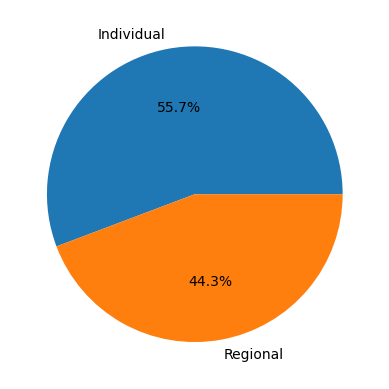

In [24]:
fig, ax = plt.subplots()
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()

## Elev_Num; Elevator Number

In [7]:
Elev_Num = df['Elev_Num']
print(f"There are {Elev_Num.isnull().sum()} null values, and they are located at \n{np.where(Elev_Num.isnull())[0]}")

There are 4 null values, and they are located at 
[ 28  80 168 170]


In [8]:
Elev_Num = Elev_Num.dropna()
Elev_Num = Elev_Num.astype('int16')

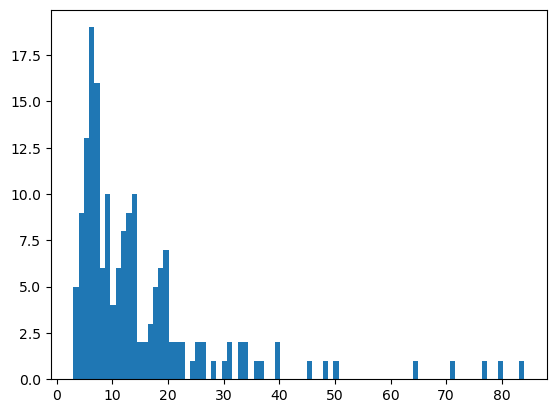

In [9]:
fig, ax = plt.subplots()
b = int(len(Elev_Num)/2)
ax.hist(Elev_Num, bins = b)
plt.show()

In [28]:
Elev_Num.describe()

count    171.000000
mean      15.087719
std       14.105002
min        3.000000
25%        6.000000
50%       11.000000
75%       19.000000
max       84.000000
Name: Elev_Num, dtype: float64

In [29]:
printApt(Elev_Num, df, dfInfo)

kaptCode           A10026879
bjdCode           1150010500
Household_Num           1194
Begin_Date        20170410.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num                84.0
Park_Above              10.0
Park_Below            1677.0
Name: 119, dtype: object
      kaptCode         Complex_Name
128  A10026879  마곡13단지 힐스테이트마스터 아파트


## Electricity Contract; Elec_Con

In [30]:
Elec_Con = df['Elec_Con']
print(f"There are {Elec_Con.isnull().sum()} null values, and they are located at \n{np.where(Elec_Con.isnull())[0]}")

There are 6 null values, and they are located at 
[ 28  41  43  80 168 170]


In [31]:
Elec_Con = Elec_Con.dropna()

In [32]:
int_EC = pd.factorize(Elec_Con)[0]
ind_EC = pd.factorize(Elec_Con)[1]
print(int_EC)
print(ind_EC)

[0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1
 1 2 0 1 1 1 0 0 0 0 2 2 0 1 2 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 2 1 2 2 0 1 0 0 2 1 0 0 0 2 1 1 1 0 2 1 1 0 1 1 0 1 1 0
 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 2 2 0 0 0 2 0 1 0 0 0
 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1]
Index(['단일계약', '종합계약', '기타'], dtype='object')


In [33]:
count_int_EC = pd.Series(int_EC).value_counts()
count_int_EC

0    102
1     54
2     13
dtype: int64

In [34]:
eng_ind_EC = ['Single', 'Comprehensive', 'Other']

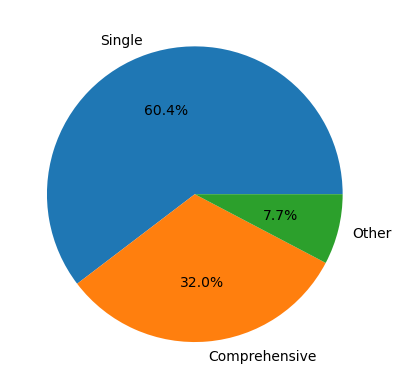

In [35]:
fig, ax = plt.subplots()
ax.pie(count_int_EC, labels=eng_ind_EC, autopct='%1.1f%%')
plt.show()

## Park_Above & Park_Below

In [10]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 4 null values, and they are located at 
[ 28  80 168 170]
There are 4 null values, and they are located at 
[ 28  80 168 170]


In [11]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0       40
1        0
2      204
3      215
4      145
      ... 
169     33
171     64
172     78
173     55
174      0
Name: Park_Above, Length: 171, dtype: int16

0      238
1      450
2      117
3      181
4      385
      ... 
169    176
171    222
172      4
173    165
174    300
Name: Park_Below, Length: 171, dtype: int16

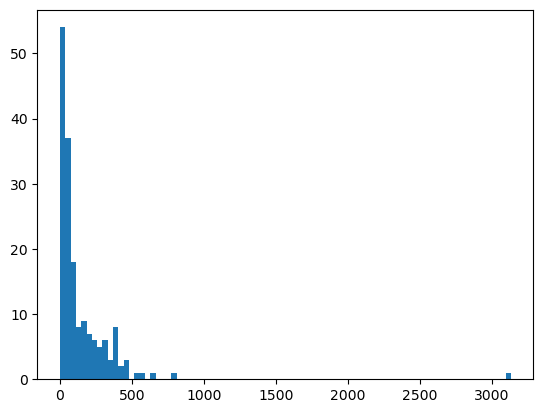

In [12]:
fig, ax = plt.subplots()
b = int(len(Park_Above)/2)
ax.hist(Park_Above, bins = b)
plt.show()

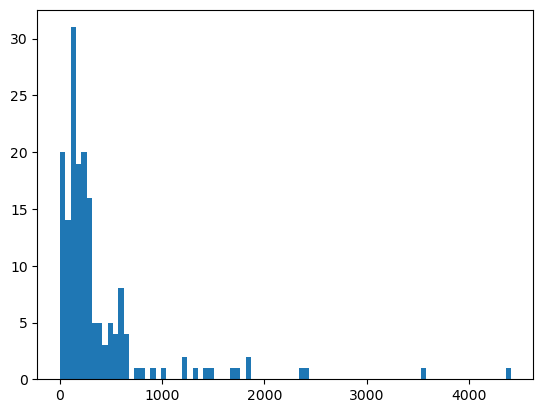

In [13]:
fig, ax = plt.subplots()
b = int(len(Park_Below)/2)
ax.hist(Park_Below, bins = b)
plt.show()

In [40]:
Park_Above.describe()

count     171.000000
mean      145.146199
std       273.409963
min         0.000000
25%        21.000000
50%        70.000000
75%       198.000000
max      3134.000000
Name: Park_Above, dtype: float64

In [41]:
Park_Below.describe()

count     171.000000
mean      378.555556
std       573.764279
min         0.000000
25%       116.500000
50%       213.000000
75%       390.500000
max      4413.000000
Name: Park_Below, dtype: float64

In [42]:
printApt(Park_Above, df, dfInfo)

kaptCode           A15701003
bjdCode           1150010300
Household_Num           2517
Begin_Date        20080108.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                71.0
Park_Above            3134.0
Park_Below             116.0
Name: 75, dtype: object
     kaptCode  Complex_Name
81  A15701003  우장산아이파크이편한세상


In [43]:
printApt(Park_Below, df, dfInfo)

kaptCode           A15701007
bjdCode           1150010300
Household_Num           2603
Begin_Date        20150819.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num                77.0
Park_Above               5.0
Park_Below            4413.0
Name: 78, dtype: object
     kaptCode Complex_Name
85  A15701007   강서힐스테이트아파트
